В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [3]:
import pandas as pd
train_val = pd.read_csv('train.csv')

In [4]:
train_val

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# ?train_test_split 

In [7]:
train, val = train_test_split(train_val, test_size=0.25, random_state=42, stratify=train_val['Exited'])

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [8]:
input_cols = list(train.columns)[3:-1]
target_col = 'Exited'

Я видалила три колонки з вхідних даних, а це дві колонки ід і також прівище замовника, бо на мою думку це індивідуальні дані кожного клієнта і ніяк не впливатимуть на вихід клієнта з банку

In [9]:
train_inputs = train[input_cols].copy()
train_targets = train[target_col].copy()
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88
...,...,...,...,...,...,...,...,...,...,...
9493,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
7687,645.0,Spain,Male,33.0,3.0,87541.06,1.0,1.0,0.0,135077.01
8143,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29
11512,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95


In [10]:
val_inputs = val[input_cols].copy()
val_targets = val[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [11]:
import numpy as np

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
numeric_cols.remove('NumOfProducts')
numeric_cols.remove('HasCrCard')
numeric_cols.remove('IsActiveMember')

In [14]:
categorical_cols.append('NumOfProducts')

In [15]:
binary_cols = ['HasCrCard', 'IsActiveMember']

In [16]:
numeric_cols, categorical_cols, binary_cols

(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'],
 ['Geography', 'Gender', 'NumOfProducts'],
 ['HasCrCard', 'IsActiveMember'])

Тут я побачила дві колонки серез нумеричних - HasCrCard і IsActiveMember, які для мене виглядають категоріальними бінарними колонками, які я б не віднесла до нумеричних для масштабування, але і не до категоріальних для OneHotEncoder, тому я створила для них окрему категорію як бінарні колонки, щоб ніяких змін із ними не робити, а просто додати у саму модель. Також вирішила колонку на кількість продуктів зробити категоріальною

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [17]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00
mean,658.99,37.69,5.02,42952.89,117904.96
std,72.12,8.14,2.78,59923.39,45553.03
min,431.00,18.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,83155.87
50%,661.00,37.00,5.00,0.00,123587.94
75%,709.00,42.00,7.00,109863.19,156774.94
max,850.00,72.00,10.00,209767.31,199992.48


In [18]:
train[numeric_cols].isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
dtype: int64

пропусків немає, супер)))

In [19]:
train_inputs[categorical_cols].nunique()

Geography        3
Gender           2
NumOfProducts    4
dtype: int64

тут лише маємо 3 колонки категоріальних змінних, і у них по 2-4 категорії, тому спокійно можна зробити OneHotEncoder, так як даних маємо багато і більша кількість стовпців тут не проблема

Дані в загальному виглядають наче нормально, тільки цікаво, що в колонці баланс більшість даних мають значення 0, а потім починаючи з 75 квантилю різко великі значення балансу на карті у клієнтів


я б провела масштабування всіх числових колонок і OneHotEncoder для категоріальних колонок , щоб вплив на втрати моделі всіх колонок був пропорційний

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [22]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [24]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [25]:
train_inputs[encoded_cols]

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
8263,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14199,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1856,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3013,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8266,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9493,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7687,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
8143,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11512,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(train_inputs[numeric_cols])

StandardScaler()

In [29]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [30]:
display(train_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
8263,0.513193,France,Male,-0.698563,-0.008436,1.463179,1.0,1.0,1.0,-0.683158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14199,-0.374256,Germany,Female,-0.698563,-0.367931,1.282909,1.0,1.0,0.0,1.313519,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1856,0.277465,France,Female,-1.926640,-0.367931,-0.716829,2.0,1.0,1.0,0.981199,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3013,0.637991,France,Male,1.266360,-0.727425,-0.716829,2.0,1.0,0.0,0.041916,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8266,0.513193,France,Female,-0.330140,0.710553,-0.716829,2.0,1.0,0.0,-0.383769,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
1855,-1.608364,France,Male,-1.066986,1.429542,1.280624,1.0,0.0,0.0,-1.363073,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1273,-0.845713,Germany,Male,0.406706,-0.727425,1.350297,1.0,1.0,0.0,1.294460,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5414,-0.526786,France,Male,-0.821371,0.710553,-0.716829,1.0,1.0,1.0,0.709918,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10923,-0.859579,France,Male,2.248822,-0.727425,-0.716829,4.0,1.0,0.0,-0.328604,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5835,1.248112,Spain,Female,0.529514,-0.008436,-0.716829,1.0,1.0,1.0,1.402602,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [32]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 19)
train_targets: (11250,)
val_inputs: (3750, 19)
val_targets: (3750,)


In [33]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [34]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [35]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

In [36]:
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [37]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 19)
train_targets: (11250,)
val_inputs: (3750, 19)
val_targets: (3750,)


Файли збереглися правильно

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [38]:
X_train = train_inputs[numeric_cols + encoded_cols + binary_cols]
X_val = val_inputs[numeric_cols + encoded_cols + binary_cols]
X_train

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,HasCrCard,IsActiveMember
8263,0.513193,-0.698563,-0.008436,1.463179,-0.683158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
14199,-0.374256,-0.698563,-0.367931,1.282909,1.313519,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1856,0.277465,-1.926640,-0.367931,-0.716829,0.981199,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3013,0.637991,1.266360,-0.727425,-0.716829,0.041916,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8266,0.513193,-0.330140,0.710553,-0.716829,-0.383769,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,-0.360389,-0.575755,-0.367931,-0.716829,0.123644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7687,-0.193993,-0.575755,-0.727425,0.744119,0.376985,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8143,-0.526786,-1.066986,1.070048,-0.716829,0.343139,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
11512,-0.956644,0.529514,0.710553,-0.716829,-0.993634,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#?LogisticRegression

In [41]:
train_targets.value_counts()

0.0    8961
1.0    2289
Name: Exited, dtype: int64

In [42]:
model = LogisticRegression(solver='liblinear')

In [43]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
train_preds = model.predict(X_train)

In [46]:
confusion_matrix(train_targets, train_preds)

array([[8560,  401],
       [ 805, 1484]], dtype=int64)

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(train_targets, train_preds)

0.7110685194058457

In [49]:
val_preds = model.predict(X_val)

In [50]:
f1_score(val_targets, val_preds)

0.7112676056338028

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.92


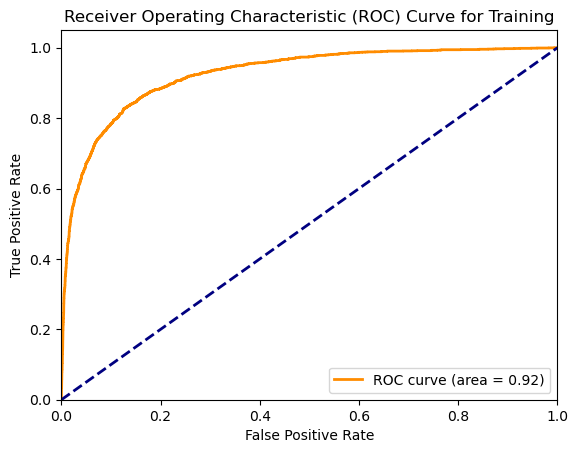

AUROC for Validation: 0.92


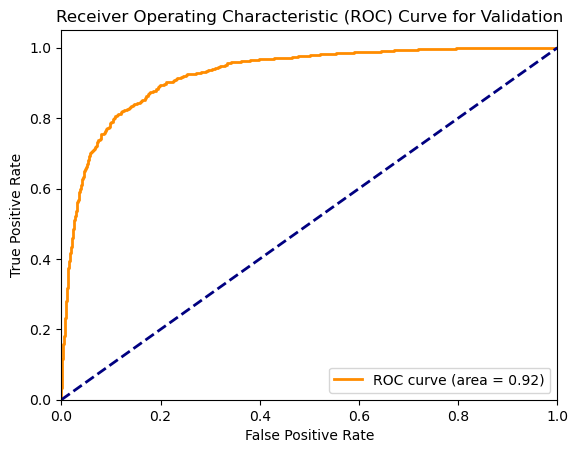

In [51]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

Як на мене, якість моделі досить непогана, майже одинакові результати у тренувальному та валідаційному наборі даних. і високі показники. Хоч мабуть її можна ще якось трохи покращити, бо 1/3 позитивних даних модель відносить до негативних

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [54]:
print('Train data')
print('Accuracy для завжди мажоритарного класу', accuracy_score(train_targets, all_no(X_train)))
print('Accuracy для нашої моделі',accuracy_score(train_targets, train_preds))

Train data
Accuracy для завжди мажоритарного класу 0.7965333333333333
Accuracy для нашої моделі 0.8928


In [55]:
print('Validation data')
print('Accuracy для завжди мажоритарного класу', accuracy_score(val_targets, all_no(X_val)))
print('Accuracy для нашої моделі',accuracy_score(val_targets, val_preds))

Validation data
Accuracy для завжди мажоритарного класу 0.7965333333333333
Accuracy для нашої моделі 0.8906666666666667


Тут теж хороші результати, що підтверджує хорошу якісь моделі)

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [56]:
import joblib

In [57]:
log_reg = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'binary_cols': binary_cols,
    'encoded_cols': encoded_cols
}

In [58]:
joblib.dump(log_reg, 'log_reg.joblib')

['log_reg.joblib']

In [59]:
model_2 = joblib.load('log_reg.joblib')

In [60]:
model_2

{'model': LogisticRegression(solver='liblinear'),
 'scaler': StandardScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'input_cols': ['CreditScore',
  'Geography',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 'target_col': 'Exited',
 'numeric_cols': ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'EstimatedSalary'],
 'categorical_cols': ['Geography', 'Gender', 'NumOfProducts'],
 'binary_cols': ['HasCrCard', 'IsActiveMember'],
 'encoded_cols': ['Geography_France',
  'Geography_Germany',
  'Geography_Spain',
  'Gender_Female',
  'Gender_Male',
  'NumOfProducts_1.0',
  'NumOfProducts_2.0',
  'NumOfProducts_3.0',
  'NumOfProducts_4.0']}

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [61]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, binary_cols, input_df: pd.DataFrame):
    input_df = input_df.copy()
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols + binary_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [62]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, binary_cols, train_inputs[:5])

array([0.00176934, 0.07807521, 0.00020922, 0.00052669, 0.00092744])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [63]:
test_raw_df = pd.read_csv('test.csv')

In [64]:
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, binary_cols, test_raw_df)
test_raw_df['Exited']

0       0.079479
1       0.014457
2       0.063201
3       0.294143
4       0.023609
          ...   
9995    0.009265
9996    0.010384
9997    0.006955
9998    0.142103
9999    0.139249
Name: Exited, Length: 10000, dtype: float64

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [65]:
submission_df = test_raw_df[['id', 'Exited']]

In [66]:
print(submission_df.head())

      id    Exited
0  15000  0.079479
1  15001  0.014457
2  15002  0.063201
3  15003  0.294143
4  15004  0.023609


In [68]:
submission_df.to_csv('submission_log_reg.csv', index=False)